<a href="https://colab.research.google.com/github/Lindelani-3/Python-Notebooks/blob/mainBranch/synthetic_ad_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!pip install pymc3 

In [39]:
import numpy as np
import pandas as pd
import bnlearn as bn
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

## Data

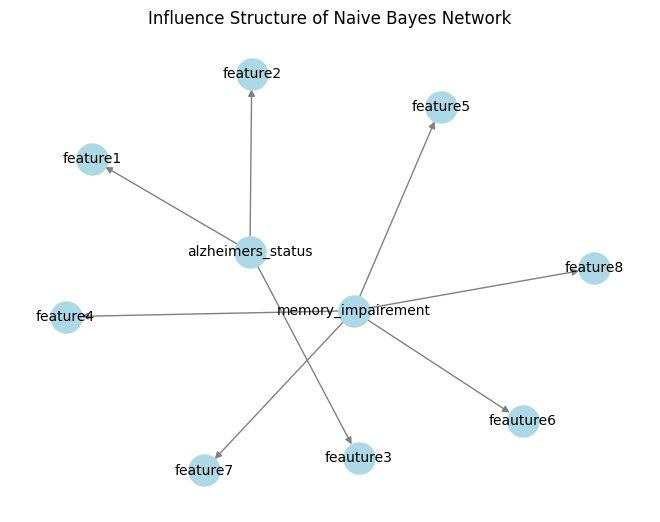

In [22]:
# Define the influence structure as a dictionary
structure = {
    'alzheimers_status': ['feature1', 'feature2', 'feauture3'],
    'memory_impairement': ['feature4', 'feature5', 'feauture6', 'feature7', 'feature8'],
    
}   #'alzheimers_status': ['feature2'],

# Create a directed graph object
G = nx.DiGraph(structure)

# Set the layout for the graph (optional)
layout = nx.fruchterman_reingold_layout(G) #nx.circular_layout

# Draw the nodes and edges
nx.draw(G, pos=layout, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')

# Add a title and show the graph
plt.title('Influence Structure of Naive Bayes Network')
plt.show()

In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the number of samples
n_samples = 1000

# Generate synthetic data for the features
feature1_data = np.random.normal(loc=0, scale=1, size=n_samples)
feature2_data = np.random.normal(loc=2, scale=1, size=n_samples)
feature3_data = np.random.normal(loc=-2, scale=1, size=n_samples)
ad_status = np.random.randint(2, size=n_samples)  # random 0s and 1s

# Define the synthetic data dictionary
synthetic_data = {
    'feature1': feature1_data,
    'feature2': feature2_data,
    'feature3': feature3_data,
    'alzheimers_status': ad_status
}

# Print the synthetic data (optional)
df = pd.DataFrame(synthetic_data)
print(df)


Data meant for the prediction of Alzheimer's Disease (AD) typically consists of various features that are believed to be relevant indicators or risk factors for AD. Here are eight commonly used features in AD prediction along with their descriptions:

**Age**: Age of the individual at the time of assessment.
**Sex**: Gender of the individual (male or female).
**Education**: Level of education completed by the individual (e.g., number of years of formal education).
**Genetic Markers**: Presence or absence of specific genetic markers associated with AD risk (e.g., APOE4 allele).
**Cognitive Assessments**: Scores from cognitive tests assessing memory, attention, executive functions, and other cognitive domains.
**Imaging Data**: Measures obtained from brain imaging techniques such as MRI or PET, including volumes of specific brain regions or presence of biomarkers like amyloid plaques.
**Blood Markers**: Levels of specific biomarkers in blood samples that are associated with AD pathology (e.g., beta-amyloid, tau).
**Family History**: Information about the presence of AD or other related dementias in the individual's family.

In [ ]:
s_data_2 = {
    'Age': [65, 72, 68, 75, 62],
    'Sex': ['Female', 'Male', 'Female', 'Male', 'Male'],
    'Education': [12, 16, 9, 10, 14],
    'APOE4': [1, 1, 0, 1, 0],
    'MMSE': [27, 23, 25, 29, 20],
    'Amyloid': [1, 0, 1, 1, 0],
    'Cognitive_Score': [25, 28, 20, 22, 26],
    'Imaging_Data': ['Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal'],
    'Blood_Marker': ['Normal', 'Elevated', 'Normal', 'Elevated', 'Elevated'],
    'Family_History': ['Yes', 'No', 'No', 'No', 'Yes'],
    'AD_Status': np.random.randint(2, size=5)
}


# Print the synthetic data (optional)
data = pd.DataFrame(s_data_2)
print(data)

## Preprocessing Data

In [47]:
scaler = MinMaxScaler()

# Normalize numerical features (e.g., age, education, cognitive score)
data['Age'] = scaler.fit_transform(np.array(data['Age']).reshape(-1, 1))
data['Education'] = scaler.fit_transform(np.array(data['Education']).reshape(-1, 1))
data['Cognitive_Score'] = scaler.fit_transform(np.array(data['Cognitive_Score']).reshape(-1, 1))

label_encoder = LabelEncoder()

# Convert categorical variables to numerical representation
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Family_History'] = label_encoder.fit_transform(data['Family_History'])
data['Imaging_Data'] = label_encoder.fit_transform(data['Imaging_Data'])
data['Blood_Marker'] = label_encoder.fit_transform(data['Blood_Marker'])


print(data)

        Age  Sex  Education  APOE4  MMSE  Amyloid  Cognitive_Score  \
0  0.230769    0   0.428571      1    27        1            0.625   
1  0.769231    1   1.000000      1    23        0            1.000   
2  0.461538    0   0.000000      0    25        1            0.000   
3  1.000000    1   0.142857      1    29        1            0.250   
4  0.000000    1   0.714286      0    20        0            0.750   

   Imaging_Data  Blood_Marker  Family_History  AD_Status  
0             1             1               1          0  
1             0             0               0          0  
2             0             1               0          1  
3             1             0               0          1  
4             0             0               1          0  


## Visualizing Data

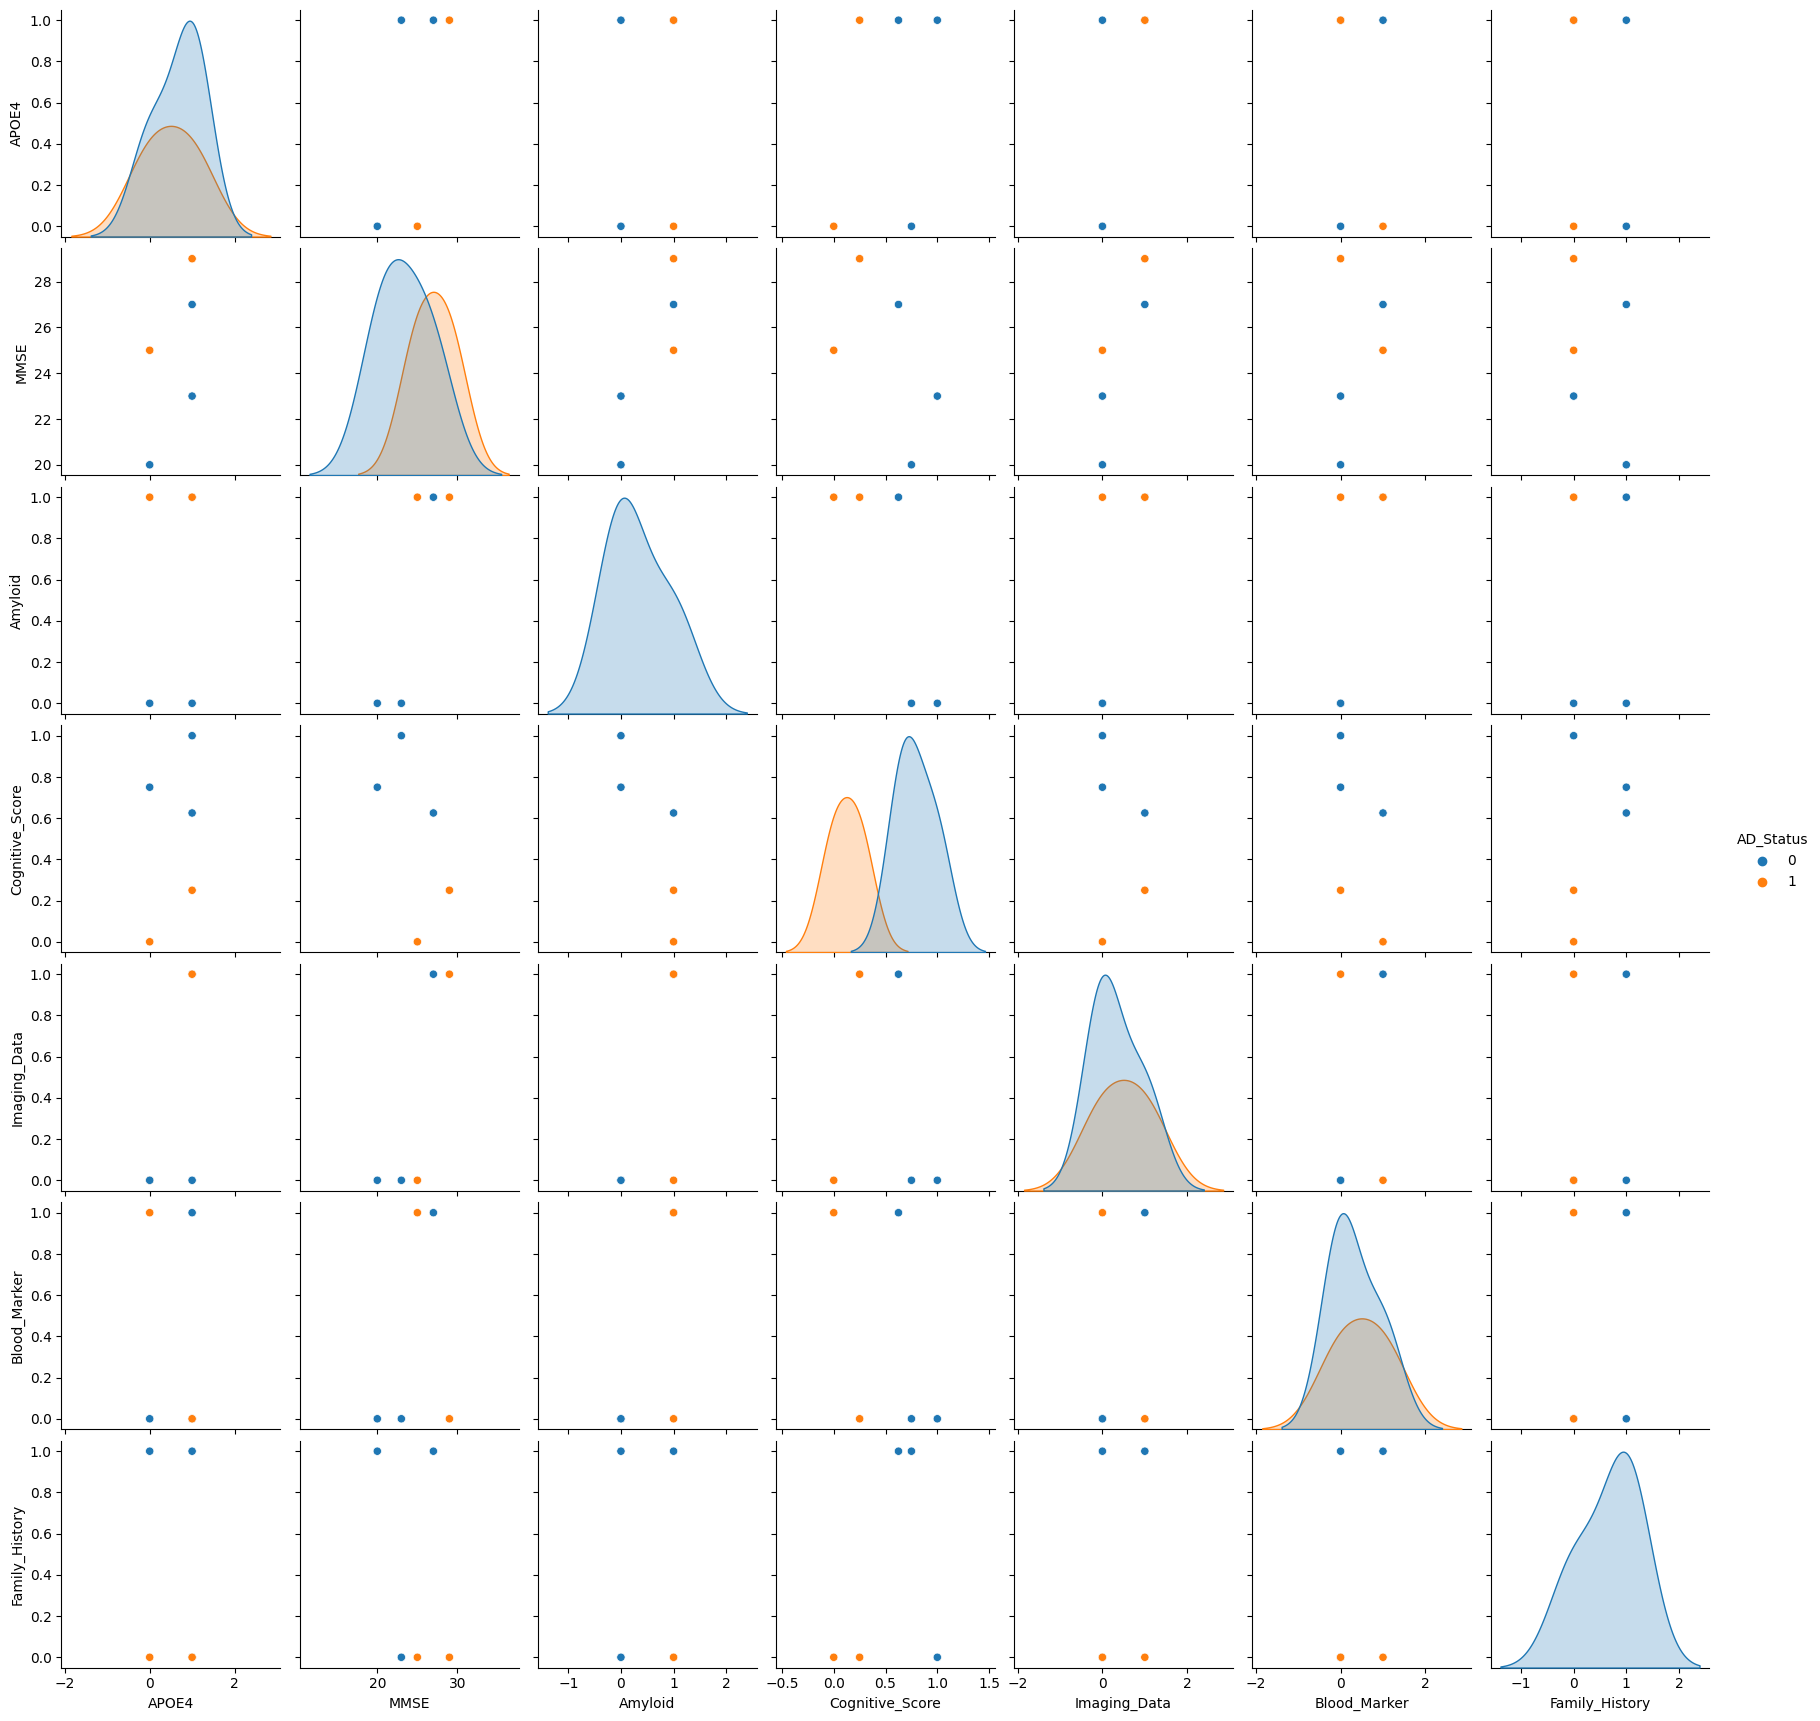

In [49]:
# Pairplot (for exploring multiple variables) {} \ {'Age', 'Sex', 'Education'}
sns.pairplot(data, vars=['APOE4', 'MMSE', 'Amyloid', 'Cognitive_Score', 'Imaging_Data', 'Blood_Marker', 'Family_History'], hue='AD_Status')
plt.show()